Import Packages

In [ ]:
Predicting Customers Churn-Identifying Customers that are Susceptible to Churn

In [14]:

from ast import literal_eval
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

## Data Collection 
Load the dataset into python with pandas

In [21]:
import pandas as pd


df = pd.read_excel('Dataset.xlsx')


Data Exploration

Understanding the data structure, statistics, and equality of the dataset,
visualizing the data to gain insights,
checking for missing values

see the first rows of the dataset

In [22]:
df.head()


,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


checking for missing values on the dataset


In [23]:
missing_values = df.isnull().sum()
missing_values


CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

check for duplicates values

In [25]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12478    False
12479    False
12480    False
12481    False
12482    False
Length: 12483, dtype: bool

to see it as one value add ".any()")

In [26]:
df.duplicated().any()

False

statistical overview of the numerical columns in the dataset

In [27]:
starts_overview = df.describe()
starts_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


Next, is to see how the target variable 'churnlabel, and some of the other variables are distributed
# set up figures and axes

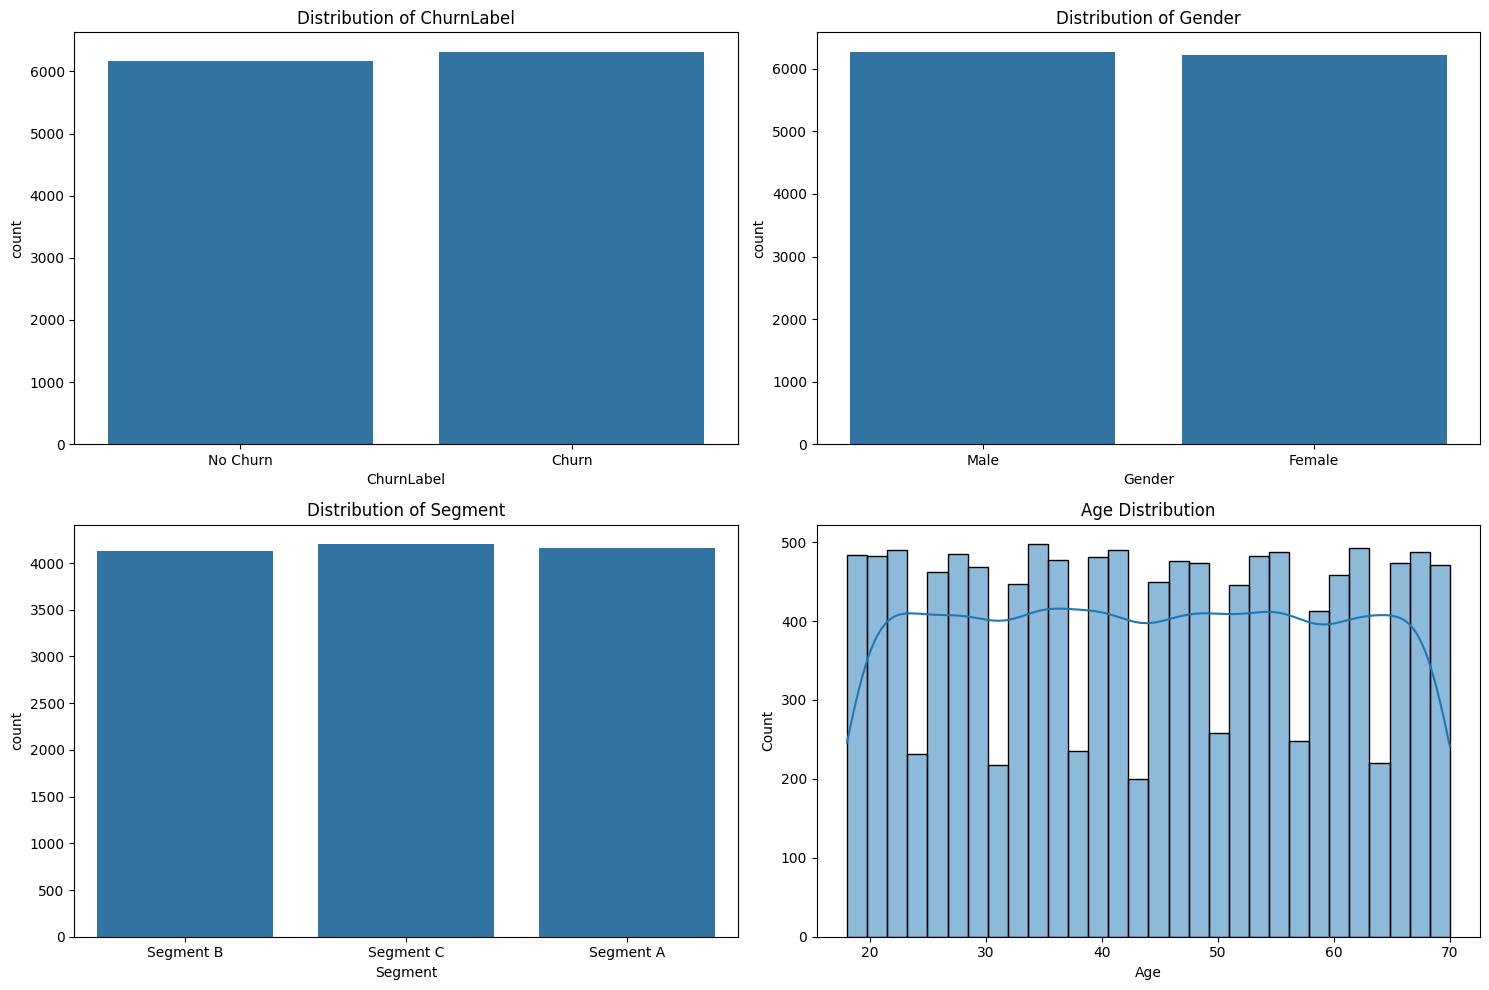

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# PLOT THE DISTRIUTION OF THE TARGET VARIABLE churnlabel
sns.countplot(x='ChurnLabel', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])

# plot distribution of the gender
sns.countplot(x='Gender', data=df, ax=ax[0,1])
ax[0, 1].set_title('Distribution of Gender')

#Plot Distribution of Segment
sns.countplot(x='Segment', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Segment')

#Age Distribution
sns.histplot(df['Age'], bins=30, ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

Correlation Analysis: which columns in the dataset correlates with the 'ChurnLabel' column

In [31]:
# calculate correlation with ChurnLabel
df.select_dtypes(include=np.number).corr()

,CustomerID,Age,NPS,ChurnLabel
CustomerID,1.000000,-0.002670,-0.002513,0.001530
Age,-0.002670,1.000000,0.000006,0.010273
NPS,-0.002513,0.000006,1.000000,-0.540703
ChurnLabel,0.001530,0.010273,-0.540703,1.000000


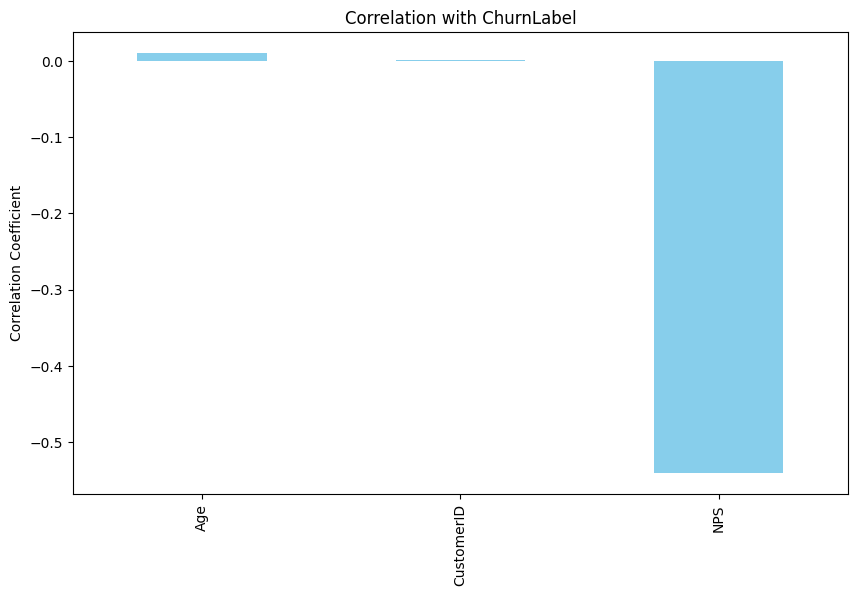

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [32]:
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

#Plot the correlation
plt.figure(figsize=(10, 6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

Exploring the nested columns, to see how they are nested

In [33]:
# List out all the nested columns
nested_columns=[
    'PurchaseHistory',
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#Print out the first value in each of the columns
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col, df[col][0]]
    print('\n| {:<{w1}} | {:{w2}} |'.format(*row, w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

Temporal Analysis: how the churn distributes its self over time
Focusing on how the churn rate distributes itself over time, to see if there are any reocuuring patterns.

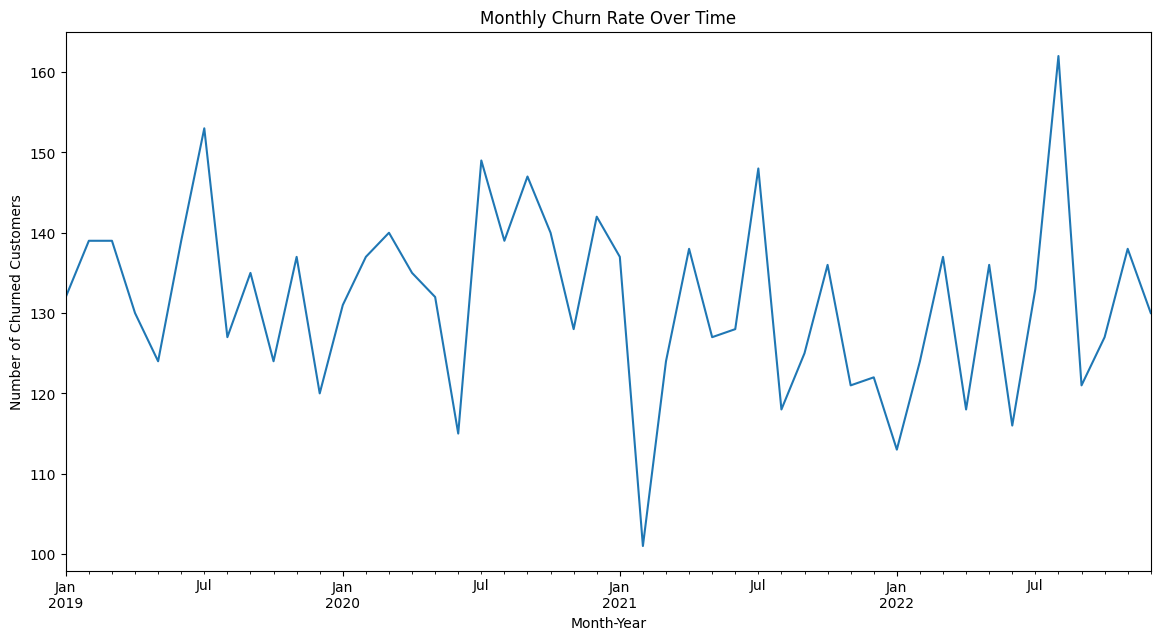

In [34]:
#Convert the Timestamp to datetime format so that itcan be grouped
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#Extract the month-year from the Timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

#Groupby MonthYear and calculate churn rate
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

#Plot the churn rate over time
plt.figure(figsize=(14, 7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

To see if there are any patterns between the customer feedback "Rating" and the "ChurnLabel"

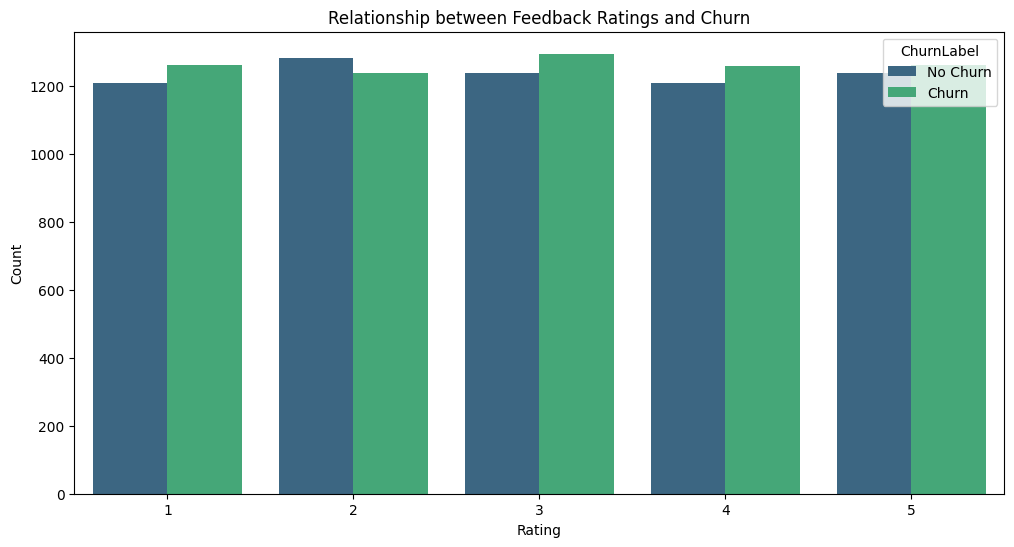

In [36]:
# EXtracting rating from the Feedback column and creating a new column for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

# Plotting the relationship between Feedback ratings and Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='FeedbackRating', hue='ChurnLabel', data=df, palette='viridis')
plt.title('Relationship between Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

From the visual above, there doesn't seem to be any indication that the Feedbaack ratings affects the ChurnLabel

# Data Preprocessing and Feature Engineering
1. create new features that may have predictive power
2. convert categorical variables to numerical variables, using encoding techniques e.g mail = 1, sms =2, because ML works with numbers
3. Scale or normalize variables if necessary
4. Split the data into training and testing subsets
5. Remove irrelevant features

## convert the nested values from the nested columns (e.g purchasehistory)from string formats  to python list and dictionaries using literal eval function

In [38]:
#  List nested column
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]
# Apply the literal_eval function
for feature in nested_columns :
    df[feature] = df[feature].apply(literal_eval)

More features will be extracted from the dataset


In [41]:
# PurchaseHistory
df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

# SubscriptionDetails
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

#Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

# MarketingCommunication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) \
        - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)   
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
     lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) \
         - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)    
              

Special extraction from three columns
1. ServiceInteractions
2. PaymentHistory
3. ClickstreamData

Check for the unique parameters for values in these columns

In [43]:
# Get all unique ServiceInteraction 'Types'
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type)) 
print('All unique Service Interaction Types:', unique_service_interaction_type)

# Get all unique methods from PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique Payment History Methods:', unique_payment_history_methods)

# Get all unique ClickstreamData 'Action'
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique Clickstream Data Actions:', unique_clickstream_data_actions)


All unique Service Interaction Types: ['Chat', 'Email', 'Call']
All unique Payment History Methods: ['Bank Transfer', 'PayPal', 'Credit Card']
All unique Clickstream Data Actions: ['Add to Cart', 'Search', 'Click']


From these three columns we're going to be encoding more


In [44]:
# ServiceInteractions
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum([i['Late_Payments'] for i in x]))    
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

# From ClickstreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickStreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))
    

See a subset of the new data

In [45]:
df.head()


,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Chat,ServiceInteractions_Email,ServiceInteractions_Call,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Add to Cart,ClickStreamData_Search,ClickStreamData_Click
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,2,1,1,40,13.333333,8,12,4
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,4,10,5,10,3.333333,8,7,9
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,2,7,3
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,24,18,17,79,26.333333,15,16,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,1,5,4,2,0.666667,17,4,9


To see all the columns availble now

In [46]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Chat',
       'ServiceInteractions_Email', 'ServiceInteractions_Call',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Ad

Pick out some columns next


In [47]:
df_ = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'ClickStreamData_Click',
    'ClickStreamData_Add to Cart',
    'ClickStreamData_Search',
    'SubscriptionDuration'
]]

df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,ClickStreamData_Click,ClickStreamData_Add to Cart,ClickStreamData_Search,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,319.0,818.0,1,1,2,40,4,8,12,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,88.0,110.0,5,10,4,10,9,8,7,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,423.0,159.0,17,18,24,79,16,15,16,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,96.0,193.0,4,5,1,2,9,17,4,580


Lets see the names of all the columns we have now

In [48]:
df_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackRating',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'ClickStreamData_Click',
       'ClickStreamData_Add to Cart', 'ClickStreamData_Search',
       'SubscriptionDuration'],
      dtype='object')

In [49]:
# to see the first values for each of the columns
df_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Click                        4
ClickStreamData_Add to Cart                  8
ClickStreamDa

# Encode Gender,SubscriptionPlan & EngagementMetricsFrequency, to remove them as strings, if there are too many unique values compared to the 
# total size of the dataset, it is best practice to leave it out
Lets check for the number of unique values

In [52]:

print('Total dataset length:', len(df_))
df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total dataset length: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

Encoding the string parameters using 1's and 0's

In [55]:
# Gender encoding
gender_map = {'Male':0, 'Female': 1}

# SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique() 
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}    

# Encode
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)

In [56]:
df_.loc[0]

Age                                         31
Gender                                     NaN
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                             0
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency                   0
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Click                        4
ClickStreamData_Add to Cart                  8
ClickStreamDa

Plot correlation matrix

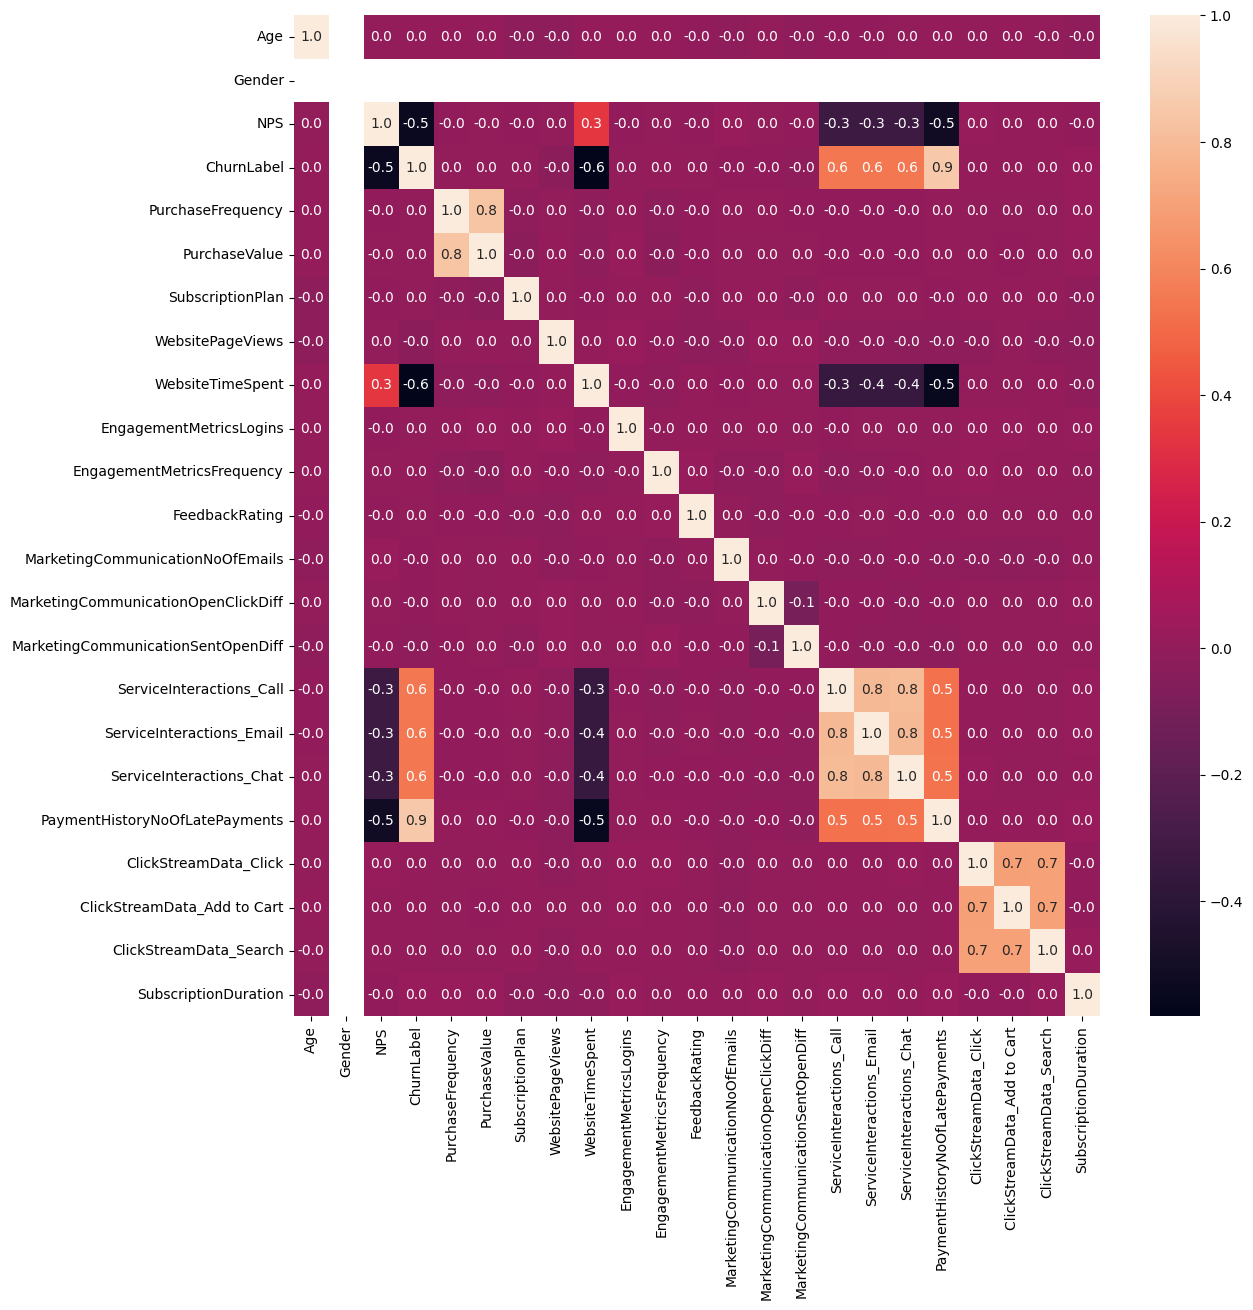

In [57]:
df_corr = df_.corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df_corr, annot=True, fmt='.1f', ax=ax)
plt.show()

"As can be seen, if we focus on the `ChurnLabel`, we see that:
        `NPS` exhibits some moderate negative correlation (-0.5) with the `ChurnLabel`,
        `WebsiteTimeSpent` exhibits some moderate negative correlation (-0.6) with the `ChurnLabel`,
        `ServiceInteractions_Call` exhibits some moderate postive correlation (0.6) with the `ChurnLabel`,
        `ServiceInteractions_Email` exhibits some moderate positive correlation (0.6) with the `ChurnLabel`
        `ServiceInteractions_Chat` exhibits some moderate positive correlation (0.6) with the `ChurnLabel`
        `PaymentHistoryNoOfLatePayments` exhibits some high positive correlation (0.9) with the `ChurnLabel`,
         `PaymentHistoryAvgNoOfLatePayments` exhibits some high positive correlation (0.9) with the `ChurnLabel`,

Split data intobtrain, test and validation sets

In [58]:
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

In [59]:
# Standard scaling ( to scale the data down)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

Data Modelling using 
Two different Models
1. LogisticRegression
2. DecisionTreeClassifier


Metrics for evaluation includes
1. Accuracy Score
2. Precision Score
3. Recall Score
4. F1 Score

In [62]:
def evaluate(X, y, model, subset=''):
    y_pred = model.predict(X)

    print(f'{subset} Accuracy Score: {accuracy_score(y_pred, y)}')
    print(f'{subset} Precision Score: {precision_score(y_pred, y)}')
    print(f'{subset} Recall Score: {recall_score(y_pred, y)}')
    print(f'{subset} F1 Score: {f1_score(y_pred, y)}')

#### Modelling with Logistic Regression
DUE TO THE FACT THAT MY MODEL HAS NULL VALUES, I REPLACED IT WITH THE MEDIAN OF THE VALUES, 
BECAUSE IT CANNOT PASS THE TARINING TEST IF THE NULL VALUES ARE NOT ADDRESSED

In [72]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or use 'median' or 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)


In [73]:
# Build the Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model on train and validation subsets
evaluate(X_train, y_train, lr, 'Train')
evaluate(X_val, y_val, lr, 'Validation')

Train Accuracy Score: 0.9708592028840376
Train Precision Score: 0.9657412876550502
Train Recall Score: 0.9767025089605734
Train F1 Score: 0.9711909711909712
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


# Modelling with Decision Trees

In [76]:
# Build the model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

#Evaluate on train and validation subsets
evaluate(X_train, y_train, dt, 'Train')
evaluate(X_val, y_val, dt, 'Validation')

Train Accuracy Score: 0.9768676146605247
Train Precision Score: 0.9769639692852924
Train Recall Score: 0.9775413711583925
Train F1 Score: 0.9772525849335303
Validation Accuracy Score: 0.9693333333333334
Validation Precision Score: 0.9724517906336089
Validation Recall Score: 0.9644808743169399
Validation F1 Score: 0.9684499314128944


On the validation dataset:
for Accuracy score: the Decision Tree model performed slightly better
for Precision score: the Decision Tree model performed slightly better
or Recall score: the Logistic Regression model performed slightly better
for F1 score: the Decision Tree model performed slightly better.
      

#### Evaluation on the Test  Set
i had to also remove NaN values with mean of the values


In [84]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_test = imputer.fit_transform(X_test)


In [86]:
evaluate(X_test, y_test, lr, 'LogisticRegression Test')

evaluate(X_test, y_test, dt, 'DecisionTree Test')


LogisticRegression Test Accuracy Score: 0.9690898683457355
LogisticRegression Test Precision Score: 0.9644495412844036
LogisticRegression Test Recall Score: 0.9733796296296297
LogisticRegression Test F1 Score: 0.9688940092165899
DecisionTree Test Accuracy Score: 0.9730967372638809
DecisionTree Test Precision Score: 0.9724770642201835
DecisionTree Test Recall Score: 0.9735935706084959
DecisionTree Test F1 Score: 0.9730349971313826


for Accuracy score: the Decision Tree model performed slightly better
for Precision score: the Decision Tree model performed slightly better
for Recall score: the Decision Tree model performed slightly better
for F1 score: the Decision Tree model performed slightly better

Plotting Confusion Matrix next

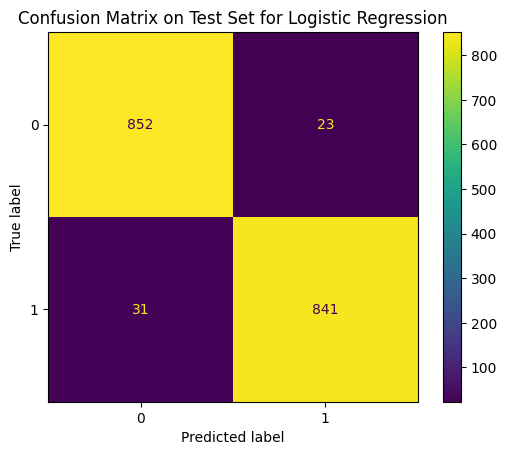

In [87]:
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Logistic Regression')
plt.show()

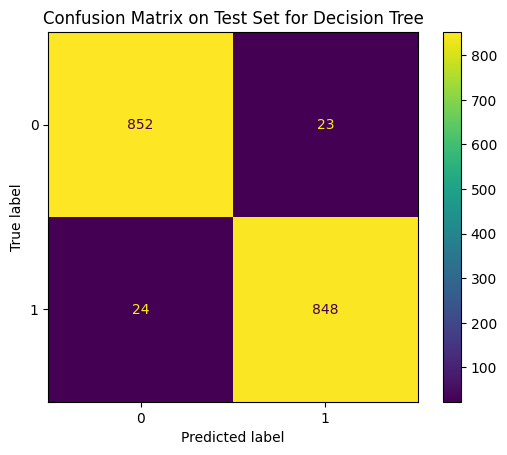

In [88]:
dt_y_pred = dt.predict(X_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Decision Tree')
plt.show()

from the decision matrix of both models
They both perform well at predicting customers that did not churn
Decision Tree performs better at predicting customers that churned.

CONCLUSION

The parameters that are most important in determining whether or not a customer will churn are:
1. the number of Service Interactions the customer has had with customer service through Call, Email and Chat
2. the number of times the customer has made Late Payments
3. the time spent on the company's website
4. and the Net Promoter Score (NPS) of the customer, which measures customer loyalty and satisfaction.
      